<a href="https://colab.research.google.com/github/rajeev-gautam/MNSIT_Handwritten_Digit_Recognizer/blob/main/MNSIT_Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0])

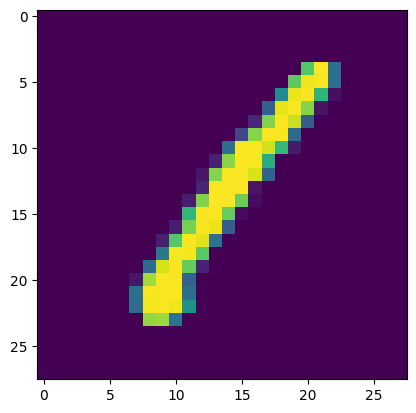

In [6]:
plt.imshow(number)

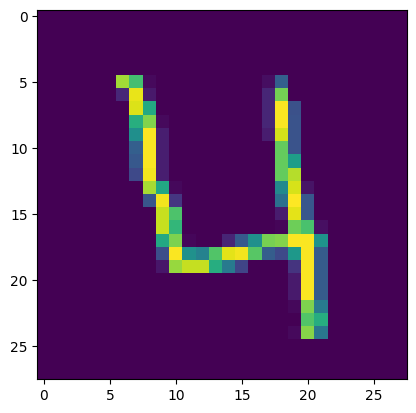

In [7]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(number4)

In [8]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

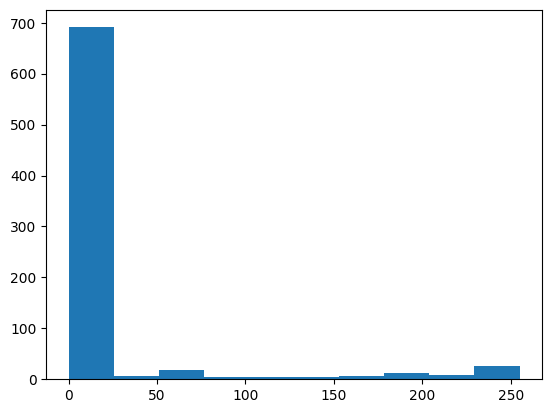

In [9]:
plt.hist(arr)

In [10]:
max(arr)

255

In [11]:
min(arr)

0

In [12]:
np.mean(arr)

np.float64(19.164540816326532)

## Missing Values

In [13]:
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [14]:
x = np.array(train)
y = np.array(test)

In [15]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

## Feature Engineering

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [20]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Model - KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [25]:
int(knn.predict(X_test[90].reshape(1,-1)))

/tmp/ipython-input-575576526.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[90].reshape(1,-1)))


2

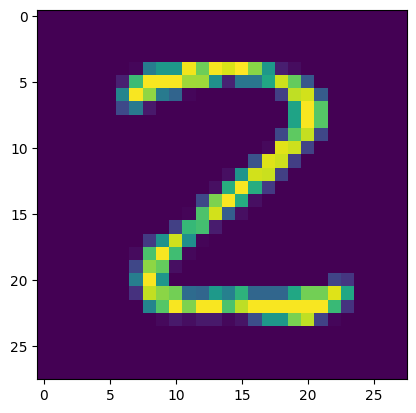

In [26]:
num = np.array(test.iloc[90,:]).reshape(28,28)
plt.imshow(num)